In [10]:
import datasets
ds = datasets.load_dataset("Asap7772/code_contests_llamasft1e-5_mc_passk-part1-of-1_graded")

In [4]:
all_scores = ds['train']['is_corrects']

In [11]:
pass_k_so_far = [0] * len(all_scores[0])
print(len(all_scores))
for i in range(len(all_scores)):
    is_correct_so_far = False
    for j in range(len(all_scores[i])):
        is_correct_so_far = is_correct_so_far or all_scores[i][j]
        pass_k_so_far[j] += int(is_correct_so_far)


102


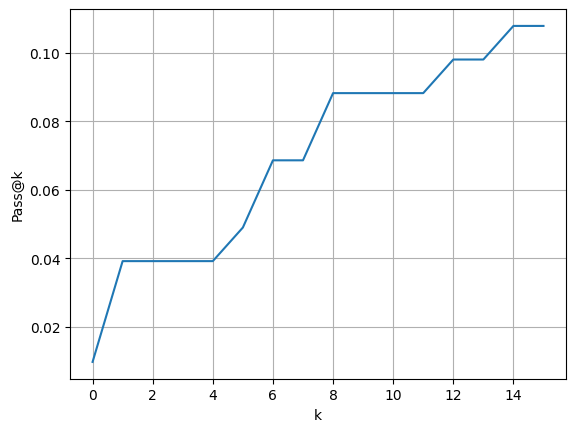

In [15]:
import matplotlib.pyplot as plt
import numpy as np
arr = np.array(pass_k_so_far) / len(all_scores)
plt.plot(arr)
plt.xlabel('k')
plt.ylabel('Pass@k')
# plt.xscale('log')
plt.grid()
plt.show()